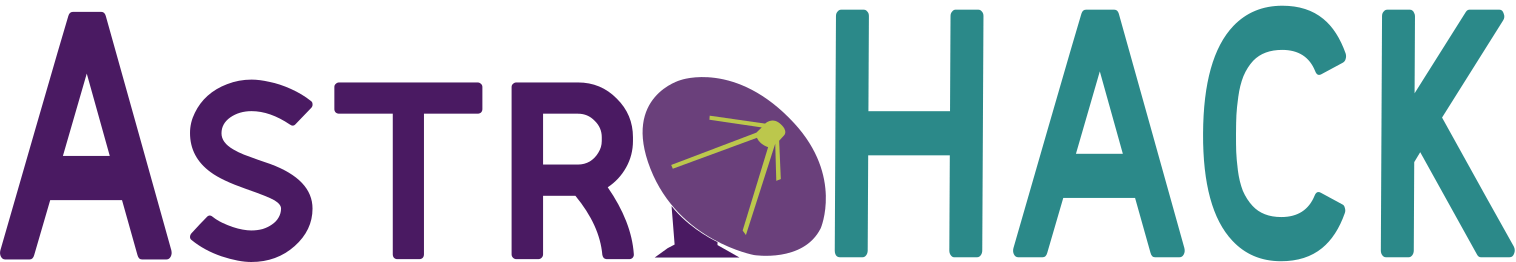

# Visualization Tutorial

This visualization tutorial uses the same dataset that is used on the VLA tutorial.
If the VLA tutorial has been previously run on the same directory the data will be re-utilized.

In [1]:
import os

from importlib.metadata import version

try:
    import astrohack
    
    print('AstroHACK version', version('astrohack'), 'already installed.')
except ImportError as e:
    print(e)
    print('Installing AstroHACK')
    
    os.system("pip install astrohack")
    
    import astrohack 
    print('astrohack version', version('astrohack'), ' installed.')

AstroHACK version 0.1.4 already installed.


In [2]:
# Convenience function:
import glob
def list_directory_files(path):
    try:
        for entry in glob.glob(path):
            print(entry)
    except FileNotFoundError:
        print(f'{path} not found.')

## Download Tutorial Data and spawning an Astrohack Client

If the VLA data cannot be found in the specified directory it will be downloaded.
The Astrohack client is spawned so that parallel processing is possible further down.

In [3]:
from astrohack.gdown_utils import gdown_data
from astrohack.astrohack_client import astrohack_local_client

gdown_data('ea25_cal_small_after_fixed.split.ms', download_folder='data')
ms_name = 'data/ea25_cal_small_after_fixed.split.ms'

client = astrohack_local_client(cores=2, memory_limit='8GB')

2023-06-01 10:46:59,458 - INFO     - astrohack - (_check_parms.py:135) - [_check_logger_parms]: Setting default log_to_term to True.
2023-06-01 10:46:59,459 - INFO     - astrohack - (_check_parms.py:135) - [_check_logger_parms]: Setting default log_to_file to False.
2023-06-01 10:46:59,459 - INFO     - astrohack - (_check_parms.py:135) - [_check_logger_parms]: Setting default log_file to hack_.
2023-06-01 10:46:59,459 - INFO     - astrohack - (_check_parms.py:135) - [_check_logger_parms]: Setting default log_level to INFO.
2023-06-01 10:46:59,460 - INFO     - astrohack - (_check_parms.py:135) - [_check_worker_logger_parms]: Setting default log_to_term to False.
2023-06-01 10:46:59,460 - INFO     - astrohack - (_check_parms.py:135) - [_check_worker_logger_parms]: Setting default log_to_file to False.
2023-06-01 10:46:59,461 - INFO     - astrohack - (_check_parms.py:135) - [_check_worker_logger_parms]: Setting default log_file to hack_.
2023-06-01 10:46:59,462 - INFO     - astrohack - (_

## Extract_holog: checking data calibration

Astrohack requires the measurement set (MS) that is fed into `extract_holog` to be properly calibrated in CASA.
To check that calibration is sound a method has been implemented in the `holog_mds` class that plots the visibilities at the center of the beam.

### Run extract_holog or open a holog file

Prior to plotting the diagnostic plots it is necessary to create a `holog_mds` object (holography Multi DataSet). This Object can be created by running `extract_holog`, or by opening the data products of `extract_holog` with function `open_holog`.
Here `extract_holog` is executed if a previously produced `.holog.zarr` file is not found.

In [4]:
import os
from astrohack import extract_holog, open_holog

holog_file = 'data/ea25_cal_small_after_fixed.split.holog.zarr'

if os.path.exists(holog_file):
    holog_mds = open_holog(holog_file)
else:
    holog_mds = extract_holog(ms_name=ms_name, 
                              data_column='CORRECTED_DATA', 
                              parallel=True,
                              overwrite=True
                             )

Now that we have a `holog_mds` object we define a variable `holog_exports` with the name of the directory to contain our diagnostic plots. We can also inspect our `holog_mds` object by calling its `summary` method. This method lists the attributes of the `holog_mds`, such as the input MS and the inputs given by the user, but more importantly for us going forward it gives us a summary of the data contents and the available methods, here we want to play particular attention to the `plot_diagnostics` method.

In [5]:
holog_exports = 'holog_exports'
holog_mds.summary()

####################################################################################################
###                                         Summary for:                                         ###
###                       data/ea25_cal_small_after_fixed.split.holog.zarr                       ###
####################################################################################################

Attributes:
+---------------------------+--------------------------------------------------+
| Attribute                 | Value                                            |
+---------------------------+--------------------------------------------------+
| version                   | 0.1.4                                            |
| origin                    | extract_holog                                    |
| cell_size                 | 0.0006442347018127532                            |
| n_pix                     | 961                                              |
| telescope_name

### Calibration diagnostic plots

Below is a call to `plot_diagnostics`, we limit our plotting to only DDI 0 of antenna ea25 for simplicity. The plot shown here displays the Amplitudes and phases for RR and LL correlations at the beam center for all channels. Here we want to make sure that the Amplitudes remain close to 1, and that the phase remains close to 0. The data displayed here is well calibrated but displays the Gibbs phenomenon at the band edges which is normal.

2023-06-01 10:47:01,625 - INFO     - astrohack - (_check_parms.py:135) - [plot_diagnostics]: Setting default map to all.
2023-06-01 10:47:01,626 - WARNING  - astrohack - (_dio.py:228) - [plot_diagnostics]: Destination folder already exists, results may be overwritten


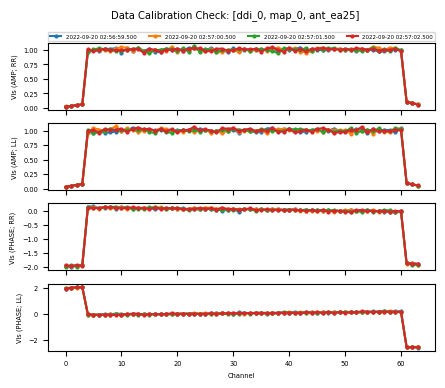

In [6]:
holog_mds.plot_diagnostics(holog_exports,         # Directory to contain the plots
                           ant_id='ea25',         # Plotting antenna ea25
                           ddi=0,                 # Plotting DDI 0
                           map_id=None,           # Plotting all mappings
                           complex_split='polar', # Split complex data to polar (amplitude + phase)
                           display=True,          # Display results in Notebook cell
                           parallel=False)        # Don't plots in parallel

Below we call `plot_diagnostics` again but this time over all the antennas and DDIs in the `holog_mds`. As before the created plots are stored in `holog_exports` but this time they are not displayed for brevity. All the files created by `plot_diagnostics` can be seen in the following cell.

In [7]:
holog_mds.plot_diagnostics(holog_exports,             # Directory to contain the plots
                           ant_id=None,               # Plotting all antennae
                           ddi=None,                  # Plotting all DDIs
                           map_id=None,               # Plotting all mappings
                           complex_split='cartesian', # Split comples data to cartesian (real + imaginary)
                           display=False,             # don't display results in Notebook cell
                           parallel=True)             # Do plots in parallel

2023-06-01 10:47:03,453 - INFO     - astrohack - (_check_parms.py:135) - [plot_diagnostics]: Setting default ant to all.
2023-06-01 10:47:03,454 - INFO     - astrohack - (_check_parms.py:135) - [plot_diagnostics]: Setting default ddi to all.
2023-06-01 10:47:03,455 - INFO     - astrohack - (_check_parms.py:135) - [plot_diagnostics]: Setting default map to all.
2023-06-01 10:47:03,455 - WARNING  - astrohack - (_dio.py:228) - [plot_diagnostics]: Destination folder already exists, results may be overwritten


In [8]:
# All exported files
list_directory_files(holog_exports+'/holog*.png')

holog_exports/holog_diagnostics_map_0_ant_ea25_ddi_0.png
holog_exports/holog_diagnostics_map_0_ant_ea25_ddi_1.png
holog_exports/holog_diagnostics_map_0_ant_ea06_ddi_0.png
holog_exports/holog_diagnostics_map_0_ant_ea06_ddi_1.png


## Holog: Checking beam and aperture quality and exporting data to FITS files

After we are sure about the quality of the calibrated data in the MS we want to make sure that the beam is well sampled and behaved and that the apertures are well characterised and have enough resolution. For that we are going to use the methods of the `image_mds` object, i.e. the data product of the `holog` function.

### Run holog or open image file

Like before with the `.holog.zarr` file, if the `.image.zarr` is available we simply open it with `open_image`, otherwise we run `holog` to obtain our `image_mds` object.

In [9]:
import os
from astrohack import holog, open_image

image_file = 'data/ea25_cal_small_after_fixed.split.image.zarr'

if os.path.exists(image_file):
    image_mds = open_image(image_file)
else:
    image_mds = holog(holog_name=holog_file,
                      overwrite=True,
                      phase_fit=True,
                      apply_mask=True,
                      to_stokes=True,
                      parallel=True
                     )


Now that we have a `image_mds` object we define a variable `image_exports` with the name of the directory to contain our plots and exported FITS files. We can also inspect our `image_mds` object by calling its `summary` method. Like for the `holog_mds` object, this method lists the attributes of the `image_mds`, such as the input `.holog.zarr` file and the inputs given by the user, like before we are actually interested on  the data contents and the available methods. For this tutorial the relevant methods are `plot_beams`, `plot_apertures` and `export_to_fits`.

In [10]:
image_exports = 'image_exports'
image_mds.summary()

####################################################################################################
###                                         Summary for:                                         ###
###                       data/ea25_cal_small_after_fixed.split.image.zarr                       ###
####################################################################################################

Attributes:
+-------------------------+--------------------------------------------------+
| Attribute               | Value                                            |
+-------------------------+--------------------------------------------------+
| version                 | 0.1.4                                            |
| origin                  | holog                                            |
| holog_file              | data/ea25_cal_small_after_fixed.split.holog.zarr |
| grid_size               | None                                             |
| cell_size               | No

### Plotting beams

BLABLABLA `plot_beams` does not exist yet

In [11]:
antea25_ddi0_image_xds = image_mds.select(ant_id='ea25', ddi=0)
print(antea25_ddi0_image_xds)

<xarray.Dataset>
Dimensions:          (time: 1, chan: 1, pol: 4, u_prime: 442, v_prime: 442,
                      u: 529, v: 529, l: 31, m: 31, ddi: 1)
Coordinates:
  * chan             (chan) float64 1.417e+10
  * ddi              (ddi) <U5 'ddi_0'
  * l                (l) float64 0.009664 0.009019 ... -0.009019 -0.009664
  * m                (m) float64 -0.009664 -0.009019 ... 0.009019 0.009664
  * pol              (pol) <U1 'I' 'Q' 'U' 'V'
  * u                (u) float64 774.6 771.7 768.8 ... -768.8 -771.7 -774.6
  * u_prime          (u_prime) float64 648.5 645.5 642.6 ... -642.6 -645.5
  * v                (v) float64 -774.6 -771.7 -768.8 ... 768.8 771.7 774.6
  * v_prime          (v_prime) float64 -648.5 -645.5 -642.6 ... 642.6 645.5
Dimensions without coordinates: time
Data variables:
    AMPLITUDE        (time, chan, pol, u_prime, v_prime) float64 dask.array<chunksize=(1, 1, 1, 221, 221), meta=np.ndarray>
    APERTURE         (time, chan, pol, u, v) complex128 dask.array<chunk

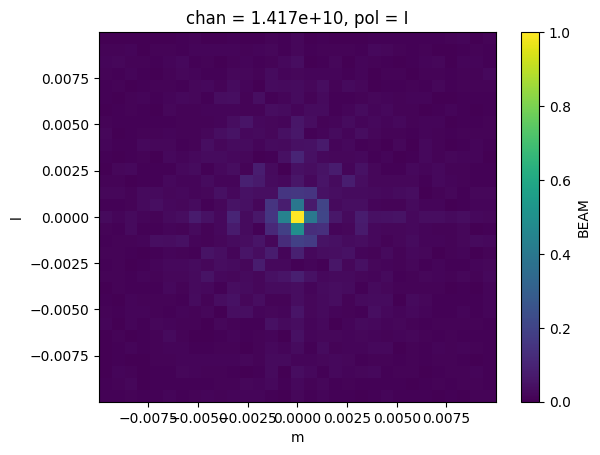

In [12]:
import numpy as np
# Beam Amplitude
np.absolute(antea25_ddi0_image_xds.BEAM.isel(chan=0, pol=0)).plot()

### Plotting apertures

2023-06-01 10:47:05,956 - WARNING  - astrohack - (_dio.py:228) - [plot_apertures]: Destination folder already exists, results may be overwritten


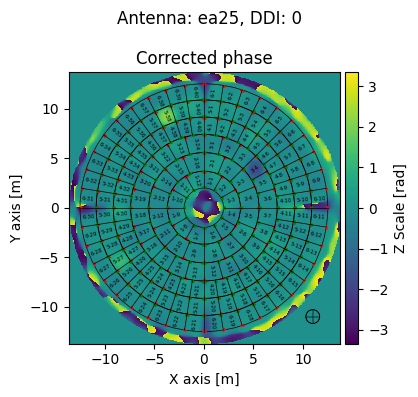

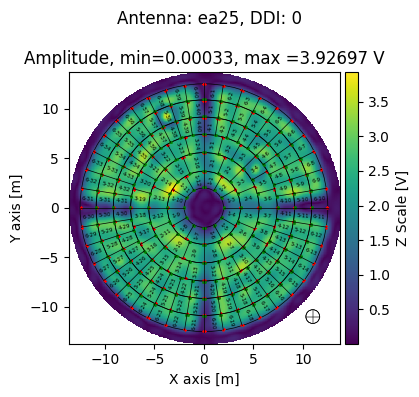

In [13]:
image_mds.plot_apertures(image_exports,       # Directory to contain the plots
                         ant_id='ea25',       # Plotting antenna ea25
                         ddi=0,               # Plotting DDI 0
                         plot_screws=True,    # Plotting screw positions
                         unit='rad',          # Plotting phase as radians
                         display=True,        # Display plots below
                         parallel=False,      # Don't do plots in parallel
                         )

In [14]:
image_mds.plot_apertures(image_exports,       # Directory to contain the plots
                         ant_id=None,         # Plotting all antennae
                         ddi=None,            # Plotting all DDIs
                         plot_screws=True,    # Plotting screw positions
                         unit='deg',          # Plotting phase as degrees
                         display=False,       # Don't display plots below
                         parallel=True,       # Do plots in parallel
                         )
# List All exported files
list_directory_files(image_exports+'/image*.png')

2023-06-01 10:47:18,011 - INFO     - astrohack - (_check_parms.py:135) - [plot_apertures]: Setting default ant to all.
2023-06-01 10:47:18,013 - INFO     - astrohack - (_check_parms.py:135) - [plot_apertures]: Setting default ddi to all.
2023-06-01 10:47:18,013 - WARNING  - astrohack - (_dio.py:228) - [plot_apertures]: Destination folder already exists, results may be overwritten
image_exports/image_corrected_phase_ant_ea25_ddi_0.png
image_exports/image_amplitude_ant_ea25_ddi_0.png
image_exports/image_corrected_phase_ant_ea25_ddi_1.png
image_exports/image_amplitude_ant_ea25_ddi_1.png
image_exports/image_corrected_phase_ant_ea06_ddi_1.png
image_exports/image_corrected_phase_ant_ea06_ddi_0.png
image_exports/image_amplitude_ant_ea06_ddi_1.png
image_exports/image_amplitude_ant_ea06_ddi_0.png


### Exporting image data to FITS

In [15]:
image_mds.export_to_fits(image_exports,             # Directory to contain FITS files
                         complex_split='cartesian', # Data will be split into real and imaginary FITS files
                         ant_id=None,               # Export all antennae
                         ddi=None,                  # Export all DDIs
                         parallel=True)             # Export FITS files in parallel

2023-06-01 10:47:36,991 - INFO     - astrohack - (_check_parms.py:135) - [export_to_fits]: Setting default ant to all.
2023-06-01 10:47:36,993 - INFO     - astrohack - (_check_parms.py:135) - [export_to_fits]: Setting default ddi to all.
2023-06-01 10:47:36,994 - WARNING  - astrohack - (_dio.py:228) - [export_to_fits]: Destination folder already exists, results may be overwritten


In [16]:
# All exported files
list_directory_files(image_exports+'/image*.fits')

image_exports/image_beam_imag_ant_ea25_ddi_0.fits
image_exports/image_aperture_real_ant_ea25_ddi_0.fits
image_exports/image_aperture_imag_ant_ea06_ddi_0.fits
image_exports/image_aperture_imag_ant_ea25_ddi_0.fits
image_exports/image_amplitude_ant_ea25_ddi_0.fits
image_exports/image_corrected_phase_ant_ea25_ddi_0.fits
image_exports/image_beam_real_ant_ea25_ddi_1.fits
image_exports/image_beam_imag_ant_ea25_ddi_1.fits
image_exports/image_aperture_real_ant_ea25_ddi_1.fits
image_exports/image_aperture_imag_ant_ea25_ddi_1.fits
image_exports/image_amplitude_ant_ea25_ddi_1.fits
image_exports/image_corrected_phase_ant_ea25_ddi_1.fits
image_exports/image_beam_real_ant_ea06_ddi_1.fits
image_exports/image_beam_imag_ant_ea06_ddi_1.fits
image_exports/image_aperture_imag_ant_ea06_ddi_1.fits
image_exports/image_beam_imag_ant_ea06_ddi_0.fits
image_exports/image_corrected_phase_ant_ea06_ddi_0.fits
image_exports/image_amplitude_ant_ea06_ddi_1.fits
image_exports/image_beam_real_ant_ea25_ddi_0.fits
image_ex

In [17]:
# Antenna ea06 DDI 0 aperture amplitude FITS header
from astropy.io import fits
hdul = fits.open(image_exports+'/image_amplitude_ant_ea06_ddi_0.fits')
print(repr(hdul[0].header))

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                  442                                                  
NAXIS2  =                  442                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    4                                                  
EXTEND  =                    T                                                  
STOKES  = 'I, Q, U, V'                                                          
WAVELENG=  0.02116132265123173                                                  
FREQUENC=        14167000000.0                                                  
TELESCOP= 'ea06    '                                                            
INSTRUME= 'VLA     '        

## Panel: screw adjustments, plotting residuals corrections and exporting data to FITS

### Run panel or open panel file

In [18]:
import os
from astrohack import panel, open_panel

panel_file = 'data/ea25_cal_small_after_fixed.split.panel.zarr'

if os.path.exists(panel_file):
    panel_mds = open_panel(panel_file)
else:
    panel_mds = panel(image_name=image_file,
                      panel_model='rigid',
                      overwrite=True,
                      parallel=True
                     )
panel_exports = 'panel_exports'
panel_mds.summary()

####################################################################################################
###                                         Summary for:                                         ###
###                       data/ea25_cal_small_after_fixed.split.panel.zarr                       ###
####################################################################################################

Attributes:
+---------------+--------------------------------------------------+
| Attribute     | Value                                            |
+---------------+--------------------------------------------------+
| version       | 0.1.4                                            |
| origin        | panel                                            |
| image_name    | data/ea25_cal_small_after_fixed.split.image.zarr |
| panel_name    | data/ea25_cal_small_after_fixed.split.panel.zarr |
| cutoff        | 0.2                                              |
| panel_kind    | rigid        

### Screw adjustments

2023-06-01 10:47:37,992 - WARNING  - astrohack - (_dio.py:228) - [export_screws]: Destination folder already exists, results may be overwritten


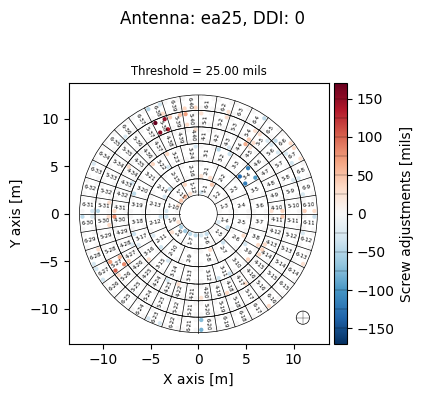

In [19]:
panel_mds.export_screws(panel_exports,            # Directory to contain the plot and text file
                        unit='mils',              # Unit to express screw adjustments in plots and texts
                        threshold= 25,            # Threshold in mils for significant adjustments
                        display=True,             # Display plot below
                        ant_id='ea25',            # Export screw adjustments for antenna ea25
                        ddi=0                     # Export screw adjustments for ddi 0
                       )

In [20]:
# All exported files
list_directory_files(panel_exports+'/panel_screws*')

panel_exports/panel_screws_ant_ea25_ddi_0.csv
panel_exports/panel_screws_ant_ea25_ddi_0.png
panel_exports/panel_screws_ant_ea25_ddi_0.txt


In [21]:
with open(panel_exports+'/panel_screws_ant_ea25_ddi_0.txt', 'r') as file:
    for _ in range(30):
        print(file.readline()[:-1])

# Screw adjustments for VLA ea25 antenna
# Adjustments are in mils

# Lower means away from subreflector
# Raise means toward the subreflector
# LOWER the panel if the number is POSITIVE
# RAISE the panel if the number is NEGATIVE


Panel           il         ir         ol         or         
1-1          -29.76      -5.02      -1.66      44.59
1-2          -15.11     -21.10      18.21       7.02
1-3           13.24      18.67       1.75      11.89
1-4          -10.09     -26.47     -10.77     -41.39
1-5          -17.63     -11.78     -17.82      -6.87
1-6          -39.12     -27.06       0.17      22.72
1-7          -44.45     -45.46      11.25       9.36
1-8          -59.02     -52.70      17.13      28.95
1-9           26.44       6.26       1.80     -35.93
1-10           5.74      25.07     -29.68       6.46
1-11          47.59      56.73     -19.20      -2.11
1-12          28.20      -0.00      35.40     -17.34
2-1           25.97      31.13      12.92      20.73
2-2          -13.

### Plotting antennae original deviation, residuals and corrections

#### Deviation plots

In [22]:
panel_mds.plot_antennae(panel_exports,           # Directory to contain the plot and text file
                        ant_id='ea25',           # Plotting Antenna ea 25
                        ddi=0,                   # Plotting DDI 0
                        plot_type='deviation',   # Do deviation plots only
                        plot_screws=False,       # Not plotting screw positions
                        parallel=True            # Do plots in parallel
                        display=True             # Display plots below
                       )

SyntaxError: invalid syntax (566775864.py, line 7)

In [ ]:
# All exported plots, including the screws plot
list_directory_files(panel_exports+'/panel*.png')

#### Ancillary plots

#### Phase plots

### Exporting panel data to FITS

In [ ]:
panel_mds.export_to_fits(panel_exports,             # Directory to contain FITS files
                         ant_id=None,               # Export all antennae
                         ddi=None,                  # Export all DDIs
                         parallel=True)             # Export FITS files in parallel

In [ ]:
# All exported files
list_directory_files(panel_exports+'/panel*.fits')

In [ ]:
# Antenna ea06 DDI 0 aperture deviation residual FITS header
from astropy.io import fits
hdul = fits.open(panel_exports+'/panel_deviation_residual_ant_ea06_ddi_0.fits')
print(repr(hdul[0].header))